## Multi Label classification
- At a time more than one class the output will be coming (eg : { target : {snow and rainy} , {fog and summer}})

In [371]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [353]:
df = pd.read_csv(r'Weather Data.csv')
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [354]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

### what is regular expression
we create patterns

* missing values
* null values
* noise values
* data types handling
* outliers - boxplot , z-scroe
* corelation matrix - 
* scaling(normalization)-numerical 
* encoding - catogorical data

### linear - 
 - which ever has high corelation
 - feature should not depent on eachother , it should be independent on eachother

In [355]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [356]:
df['Date'] = df['Date/Time'].str.split().str[0]
df['Time'] = df['Date/Time'].str.split().str[1]
df = df.drop('Date/Time',axis=1)
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date,Time
0,-1.8,-3.9,86,4,8.0,101.24,Fog,1/1/2012,0:00
1,-1.8,-3.7,87,4,8.0,101.24,Fog,1/1/2012,1:00
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1/1/2012,2:00
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1/1/2012,3:00
4,-1.5,-3.3,88,7,4.8,101.23,Fog,1/1/2012,4:00


In [357]:
df['month']=df['Date'].str.split('/').str[0].astype(int)
df['date'] = df['Date'].str.split('/').str[1].astype(int)
df['year'] = df['Date'].str.split('/').str[2].astype(int)
df = df.drop('Date',axis=1)
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Time,month,date,year
0,-1.8,-3.9,86,4,8.0,101.24,Fog,0:00,1,1,2012
1,-1.8,-3.7,87,4,8.0,101.24,Fog,1:00,1,1,2012
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2:00,1,1,2012
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3:00,1,1,2012
4,-1.5,-3.3,88,7,4.8,101.23,Fog,4:00,1,1,2012


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            8784 non-null   float64
 1   Dew Point Temp_C  8784 non-null   float64
 2   Rel Hum_%         8784 non-null   int64  
 3   Wind Speed_km/h   8784 non-null   int64  
 4   Visibility_km     8784 non-null   float64
 5   Press_kPa         8784 non-null   float64
 6   Weather           8784 non-null   object 
 7   Time              8784 non-null   object 
 8   month             8784 non-null   int64  
 9   date              8784 non-null   int64  
 10  year              8784 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 755.0+ KB


In [359]:
df['Time'] = df['Time'].str.split(':').str[0].astype(int)
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Time,month,date,year
0,-1.8,-3.9,86,4,8.0,101.24,Fog,0,1,1,2012
1,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1,1,2012
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2,1,1,2012
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3,1,1,2012
4,-1.5,-3.3,88,7,4.8,101.23,Fog,4,1,1,2012


In [360]:
df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
Time                  int64
month                 int64
date                  int64
year                  int64
dtype: object

In [361]:
X = df.drop('Weather',axis=1)
Y = df['Weather']
print(X.shape,Y.shape)

(8784, 10) (8784,)


<Axes: >

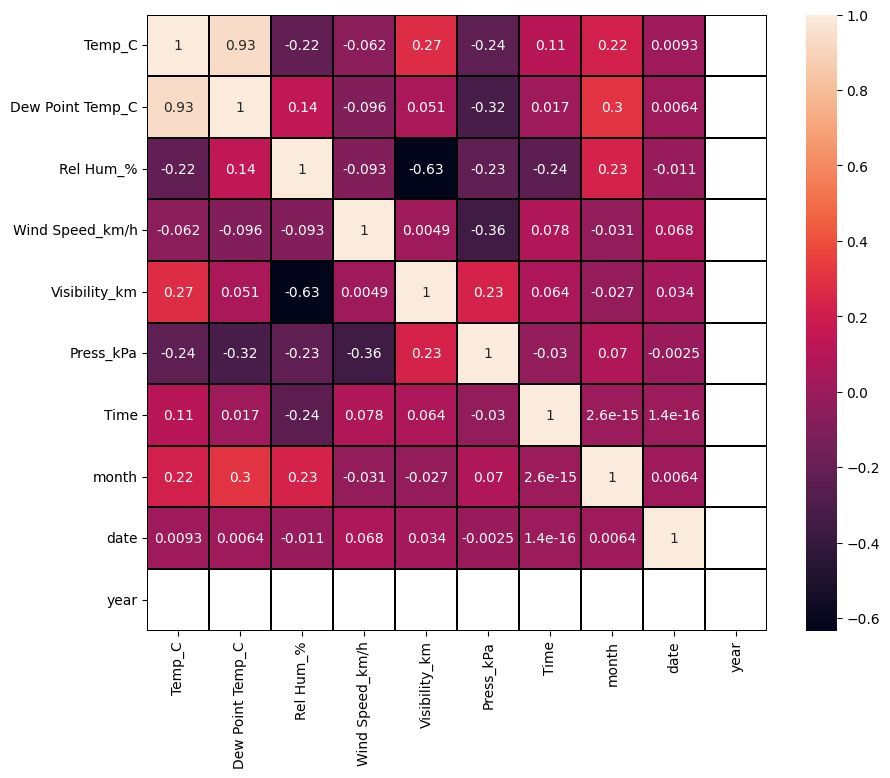

In [362]:
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(),annot=True,linewidths=0.3,linecolor='black')

In [363]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [364]:
Y_up = Y.apply(lambda x: [label.strip() for label in x.split(',')])
Y_m = mlb.fit_transform(Y_up )
Y_mlb = pd.DataFrame(Y_m,columns=mlb.classes_)
Y_mlb

,Blowing Snow,Clear,Cloudy,Drizzle,Fog,Freezing Drizzle,Freezing Fog,Freezing Rain,Haze,Heavy Rain Showers,...,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Pellets,Snow Showers,Thunderstorms
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [365]:
mlb.classes_

array(['Blowing Snow', 'Clear', 'Cloudy', 'Drizzle', 'Fog',
       'Freezing Drizzle', 'Freezing Fog', 'Freezing Rain', 'Haze',
       'Heavy Rain Showers', 'Ice Pellets', 'Mainly Clear',
       'Moderate Rain', 'Moderate Rain Showers', 'Moderate Snow',
       'Mostly Cloudy', 'Rain', 'Rain Showers', 'Snow', 'Snow Grains',
       'Snow Pellets', 'Snow Showers', 'Thunderstorms'], dtype=object)

<Axes: >

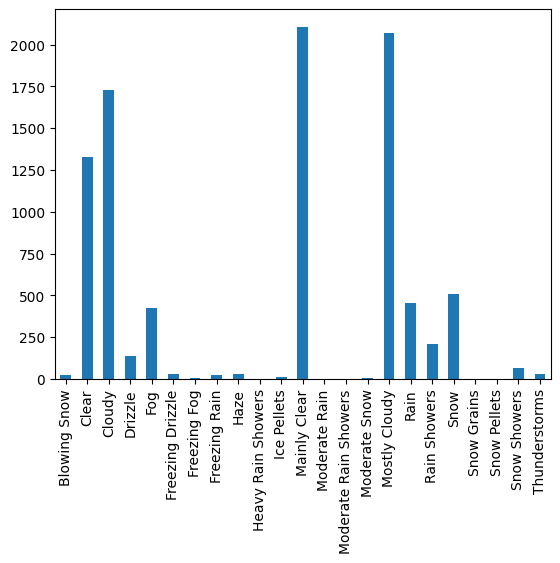

In [366]:
Y_mlb.sum().plot(kind='bar')

In [367]:
Y_mlb

,Blowing Snow,Clear,Cloudy,Drizzle,Fog,Freezing Drizzle,Freezing Fog,Freezing Rain,Haze,Heavy Rain Showers,...,Moderate Rain Showers,Moderate Snow,Mostly Cloudy,Rain,Rain Showers,Snow,Snow Grains,Snow Pellets,Snow Showers,Thunderstorms
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [368]:
x_train,x_test,y_train,y_test = train_test_split(X,Y_mlb,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6588, 10) (2196, 10) (6588, 23) (2196, 23)


In [370]:
rmd = RandomForestClassifier(n_estimators=100,random_state=42)
mltcls =MultiOutputClassifier(rmd)
mltcls.fit(x_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [376]:
y_pred = mltcls.predict(x_test)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [379]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.44398907103825136


In [382]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [384]:
model = DecisionTreeClassifier()
mltcls =MultiOutputClassifier(model)
mltcls.fit(x_train,y_train)
y_pred = mltcls.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.348816029143898


In [385]:
model = LogisticRegression()
mltcls =MultiOutputClassifier(model)
mltcls.fit(x_train,y_train)
y_pred = mltcls.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

p:\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
p:\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
p:\ven

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)